In [1]:
# Chapter1
# NN構築試行
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score  # モデルの評価を行うための関数
from keras import metrics
# 学習データ読み込み
data = pd.read_csv("train.csv")
data.head()

Using TensorFlow backend.


,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [2]:
# # Chapter2
# 学習の再現を行うために乱数シードを固定するためのコード
import os
import random as rn
from tensorflow.compat.v1.keras import backend as K

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
rn.seed(0)

tf.compat.v1.set_random_seed(0)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph())
K.set_session(sess)

pd.set_option("max_columns", None)
# pd.set_option('max_rows', None)

In [3]:
# print("デフォルトした人:", len(data[data["loan_status"]=="ChargedOff"]))
# print("デフォルトしていない人:", len(data[data["loan_status"]=="FullyPaid"]))

In [4]:
#Down Dampling
Train1 = data.where(data["loan_status"] == "ChargedOff").dropna()
Train2 = data.where(data["loan_status"] == "FullyPaid").dropna()
Train3 = Train2.sample(n=len(Train1), random_state=0)
TrainData = pd.concat([Train1, Train3])

In [5]:
TrainData.shape
data = TrainData

In [6]:
data.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
1,1.0,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
7,7.0,2147.822844,5 years,23.738449,A3,10 years,debt_consolidation,656.789397,Individual,ChargedOff
9,9.0,701.824350,3 years,11.321683,B4,0 years,credit_card,656.609116,Individual,ChargedOff
12,12.0,1244.631171,3 years,18.932798,D3,0 years,debt_consolidation,656.933143,Individual,ChargedOff
24,24.0,2278.044730,5 years,13.757983,C5,1 year,credit_card,719.038856,Individual,ChargedOff


In [7]:
# Chapter3
# def pre_process(input_data):
# データ前処理
# One-Hotエンコーディング
# pre_X = input_data.drop(["loan_status", "id"], axis=1).replace({
pre_X = data.drop(["loan_status","id"], axis=1).replace({
    "A1": 1, "A2": 2, "A3": 3, "A4": 4, "A5": 5,
    "B1": 6, "B2": 7, "B3": 8, "B4": 9, "B5": 10,
    "C1": 11, "C2": 12, "C3": 13, "C4": 14, "C5": 15,
    "D1": 16, "D2": 17, "D3": 18, "D4": 19, "D5": 20,
    "E1": 21, "E2": 22, "E3": 23, "E4": 24, "E5": 25,
    "F1": 26, "F2": 27, "F3": 28, "F4": 29, "F5": 30,
    "0 year": 0, "0 years": 0, "1 years": 1, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
    "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10 years": 10,
    "Individual": 1, "Joint App": 0,
    "purpose_car": 0,"purpose_credit_card": 1,"purpose_debt_consolidation": 1,"purpose_home_improvement": 0,"purpose_house": 0,"purpose_major_purchase": 0,"purpose_medical": 0,"purpose_other": 0,"purpose_small_business": 0,
}).astype({
    "term": "int8",
    "grade": "int8",
    "employment_length": "int8",
    "application_type": "int8",
})
pre_y = data["loan_status"]
X = pd.get_dummies(pre_X)
y = pre_y.replace({"ChargedOff": 1, "FullyPaid": 0})
# pre_X_train, pre_X_test = train_test_split(X, test_size=0.1, shuffle=False)
# y_train, y_test = train_test_split(y, test_size=0.1, shuffle=False)

# X_train = X
# X_test = X
y_train = y
y_test = y

# 加工が終わった時点でCSVに出すと、ほかのモデルでの使いまわしがきく。
# # Min-Maxスケーリング
# X_train = ((pre_X_train - pre_X_train.min()) / (pre_X_train.max() - pre_X_train.min()))
pre_X_train = ((X - X.min()) / (X.max() - X.min()))
# X_train = pre_X_train
# # Min-Maxスケーリング
# X_test = ((pre_X_test - pre_X_test.min()) / (pre_X_test.max() - pre_X_test.min()))
pre_X_test = ((X - X.min()) / (X.max() - X.min()))
# X_test = pre_X_test
    # return X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = pre_process(data)

In [8]:
pre_X_train.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
1,0.242699,1.0,0.206435,0.172414,1.0,0.278140,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.516423,1.0,0.814364,0.068966,1.0,0.008612,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.106075,0.0,0.253206,0.275862,0.0,0.007425,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.260113,0.0,0.597179,0.586207,0.0,0.009559,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.553377,1.0,0.363311,0.482759,0.1,0.418657,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pre_X_train = pre_X_train.astype("float32")
X_train = pre_X_train.drop(["purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical", "purpose_other", "purpose_small_business", "purpose_car","purpose_credit_card"], axis=1).astype({
    "term": "int8",
    "grade": "int8",
    "employment_length": "int8",
    "application_type": "int8",
    "purpose_debt_consolidation": "int8",
})
X_test = X_train

In [10]:
print("訓練データの特徴量", X_train.shape)
print("訓練データのターゲット", y_train.shape)


訓練データの特徴量 (84712, 8)
訓練データのターゲット (84712,)


In [11]:
from tensorflow import keras  # Keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.metrics import binary_accuracy, Accuracy
from tensorflow.keras.layers import SimpleRNN
import optuna


def create_model(units1, units2):
    keras.backend.clear_session()
    # Keras以外を利用するのも一つの手段。
    model = keras.models.Sequential()
    model.add(Dense(units=units1, activation=tf.nn.relu)) 
    # model.add(Dropout(0.5))
    model.add(keras.layers.BatchNormalization())  # バッチ正規化層
    model.add(Dense(units=units2, activation=tf.nn.relu)) 
    # model.add(Dropout(0.5))
    model.add(keras.layers.BatchNormalization())  # バッチ正規化層
    model.add(Dense(units=2, activation=tf.nn.softmax))  # 出力層（活性化関数はソフトマックス関数）
    model.compile(optimizer = keras.optimizers.SGD(lr=0.01),
           loss="sparse_categorical_crossentropy",
            metrics="accuracy")
         #    f1scoreにするのがよい

    return model

def objective(trial):
    keras.backend.clear_session()
    # 調整したいハイパーパラメータの設定
    # n_layer = trial.suggest_int('n_layer', 1, 2) # 追加する層を1-3から選ぶ
    units1 = int(trial.suggest_discrete_uniform('units1', 100, 500, 1)) # ユニット数
    units2 = int(trial.suggest_discrete_uniform('units2', 100, 500, 1)) # ユニット数
    epochs = int(trial.suggest_discrete_uniform('epochs', 3000, 3100, 10)) # ユニット数

    model = create_model(units1, units2)

        # (5)学習を実行してください
    es_cb = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3)
    history = model.fit(x = X_train,
        y = y_train,
        batch_size = 8192, # バッチサイズ
        # epochs = 100, # エポック数
        epochs = epochs, # エポック数
        validation_split = 0.2, # 検証データの割合
        # callbacks = [es_cb], # 早期終了の設定
        verbose = 1) # 進捗の確認を行うか（0:行わない, 1:行う）

    # return history.history["loss"][-1]
    # return history.history["val_loss"][-1]
    # return 1 - history.history["accuracy"][-1]
    return 1 - history.history["val_accuracy"][-1]



In [12]:
study = optuna.create_study()
study.optimize(objective, n_trials=1)

Epoch 1/3080
9/9 [==============================] - 0s 34ms/step - loss: 0.7675 - accuracy: 0.5719 - val_loss: 0.7503 - val_accuracy: 9.4434e-04
Epoch 2/3080
9/9 [==============================] - 0s 23ms/step - loss: 0.6399 - accuracy: 0.6310 - val_loss: 0.8180 - val_accuracy: 0.0000e+00
Epoch 3/3080
9/9 [==============================] - 0s 23ms/step - loss: 0.6249 - accuracy: 0.6474 - val_loss: 0.8835 - val_accuracy: 0.0000e+00
Epoch 4/3080
9/9 [==============================] - 0s 22ms/step - loss: 0.6212 - accuracy: 0.6495 - val_loss: 0.9564 - val_accuracy: 0.0000e+00
Epoch 5/3080
9/9 [==============================] - 0s 24ms/step - loss: 0.6156 - accuracy: 0.6561 - val_loss: 1.0240 - val_accuracy: 0.0000e+00
Epoch 6/3080
9/9 [==============================] - 0s 23ms/step - loss: 0.6111 - accuracy: 0.6649 - val_loss: 1.0920 - val_accuracy: 0.0000e+00
Epoch 7/3080
9/9 [==============================] - 0s 22ms/step - loss: 0.6109 - accuracy: 0.6637 - val_loss: 1.1618 - val_accura

KeyboardInterrupt: 

In [49]:
sorted_best_params = sorted(study.best_params.items(), key=lambda x : x[0])
best_param = dict()
for i, k in sorted_best_params:
    print(i + ' : ' + str(k))
    best_param[i] = k

epochs : 3100.0
units1 : 291.0
units2 : 106.0


In [51]:
keras.backend.clear_session()
# Keras以外を利用するのも一つの手段。
model = keras.models.Sequential()
model.add(Dense(units=best_param["units1"], activation=tf.nn.relu)) 
# model.add(Dropout(0.5))
model.add(keras.layers.BatchNormalization())  # バッチ正規化層
model.add(Dense(units=best_param["units2"], activation=tf.nn.relu)) 
# model.add(Dropout(0.5))
model.add(keras.layers.BatchNormalization())  # バッチ正規化層
model.add(Dense(units=2, activation=tf.nn.softmax))  # 出力層（活性化関数はソフトマックス関数）
model.compile(optimizer = keras.optimizers.SGD(lr=0.01),
        loss="sparse_categorical_crossentropy",
        metrics="accuracy")

In [54]:
history = model.fit(x = X_train,
        y = y_train,
        batch_size = 8192, # バッチサイズ
        # epochs = 100, # エポック数
        epochs = int(best_param["epochs"]), # エポック数
        validation_split = 0.2, # 検証データの割合
        # callbacks = [es_cb], # 早期終了の設定
        verbose = 1) # 進捗の確認を行うか（0:行わない, 1:行う）

9/9 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4787
Epoch 2963/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5173
Epoch 2964/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6933 - val_accuracy: 0.4924
Epoch 2965/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2966/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5636
Epoch 2967/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5960
Epoch 2968/3100
9/9 [==============================] - 0s 13ms/step - loss: 0.6933 - accuracy: 0.5053 - val_loss: 0.6933 - val_accuracy: 0.5324
Epoch 29

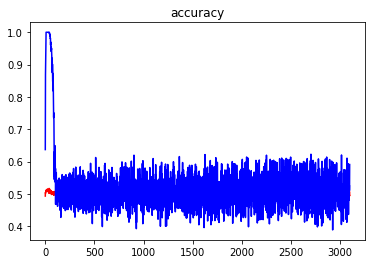

In [55]:
import matplotlib.pyplot as plt
#% matplotlib inline
x = range(int(best_param["epochs"]))  # 演習D epoch数をx軸に指定する。range()の()のなかに、数字を入力してください。数字はepochsで指定した数と同じにしてください。
plt.plot(x, history.history["accuracy"], c="red")
plt.plot(x, history.history["val_accuracy"], c="blue")
plt.title("accuracy")
plt.show()

In [56]:
# 混同行列による評価
y_proba = model.predict(X_train)
y_pred = np.argmax(y_proba, axis=1)
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[25138 17218]
 [22059 20297]]


In [57]:
# 正答率による評価
print("正解率:", accuracy_score(y_test, y_pred))

正解率: 0.5363466805175182


In [58]:
print(pd.DataFrame({'y': y_test, 'y_pred': y_pred}).head())  # 実際のクラスと分類結果を上から5つだけ表示

    y  y_pred
1   1       1
7   1       1
9   1       1
12  1       0
24  1       0


In [59]:
# 重回帰
from sklearn import linear_model  # 線形回帰を行うためのモジュール
# 変数の準備
# X = data_oh.drop(["loan_status_ChargedOff", "loan_status_FullyPaid"], axis=1)  # 説明変数の設定
# y = data_oh["loan_status_FullyPaid"]  # 目的変数の設定

# 学習
lr = linear_model.LinearRegression()  # 線形回帰モデルのインスタンスを作成
lr.fit(X_train, y_train)  # 回帰の実行

# 結果の確認
print("回帰係数:")
print(pd.DataFrame({"Name": X_train.columns,
                    "Coefficients": lr.coef_}).sort_values(by='Coefficients'))  # 回帰係数
print("切片:", lr.intercept_)  # 切片
print("決定係数:", lr.score(X_train, y_train))  # 決定係数

回帰係数:
                         Name  Coefficients
5                credit_score     -0.194555
4           employment_length      0.018616
7  purpose_debt_consolidation      0.029885
6            application_type      0.042618
1                        term      0.049005
0                   loan_amnt      0.051940
3                       grade      0.172597
2               interest_rate      0.630886
切片: 0.1686025
決定係数: 0.11967099665372971


In [60]:
X_train.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose_debt_consolidation
1,0.242699,1,0.206435,0,1,0.278140,1,0
7,0.516423,1,0.814364,0,1,0.008612,1,1
9,0.106075,0,0.253206,0,0,0.007425,1,0
12,0.260113,0,0.597179,0,0,0.009559,1,1
24,0.553377,1,0.363311,0,0,0.418657,1,0


In [61]:
# # ランダムフォレスト
# # データ前処理
# # データ分割
# X = data.drop(["id", "term", "grade", "employment_length", "purpose", "application_type", "loan_status"], axis=1)
# y_train = data["loan_status"].values
# # # Min-Maxスケーリング
# X = ((X - X.min()) / (X.max() - X.min()))

In [62]:
from sklearn.ensemble import RandomForestClassifier  # ランダムフォレストを実行するためのクラス
# 学習
RFC = RandomForestClassifier(max_depth=3, random_state=1)  # ランダムフォレストのインスタンスを作成
RFC.fit(X_train, y_train)  # ランダムフォレストの学習

# 分類結果の確認
y_pred = RFC.predict(X_train)  # 分類結果
print(pd.DataFrame({'y': y_train, 'y_pred': y_pred}).head())  # 実際のクラスと分類結果を上から5つだけ表示

    y  y_pred
1   1       0
7   1       1
9   1       0
12  1       1
24  1       0


In [63]:
# コード例2
# モデルの精度（正解率）の確認
print('正解率:', RFC.score(X_train, y_train))

正解率: 0.635458966852394


In [64]:
# 混同行列による評価
y_proba = RFC.predict(X_train)
confmat = confusion_matrix(y_train, y_proba)
print(confmat)

[[24844 17512]
 [13369 28987]]


In [65]:
# history.history["val_accuracy"]
np.savetxt("C:\work\AI\hoge.dat", y_pred)

In [66]:
# データ前処理
data_test = pd.read_csv("test.csv")
# Chapter3
# データ前処理
# One-Hotエンコーディング
# pre_X = input_data.drop(["loan_status", "id"], axis=1).replace({
pre_X = data_test.drop(["id"], axis=1).replace({
    "A1": 1, "A2": 2, "A3": 3, "A4": 4, "A5": 5,
    "B1": 6, "B2": 7, "B3": 8, "B4": 9, "B5": 10,
    "C1": 11, "C2": 12, "C3": 13, "C4": 14, "C5": 15,
    "D1": 16, "D2": 17, "D3": 18, "D4": 19, "D5": 20,
    "E1": 21, "E2": 22, "E3": 23, "E4": 24, "E5": 25,
    "F1": 26, "F2": 27, "F3": 28, "F4": 29, "F5": 30,
    "0 year": 0, "0 years": 0, "1 years": 1, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
    "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10 years": 10,
    "Individual": 1, "Joint App": 0,
    "purpose_car": 0,"purpose_credit_card": 1,"purpose_debt_consolidation": 1,"purpose_home_improvement": 0,"purpose_house": 0,"purpose_major_purchase": 0,"purpose_medical": 0,"purpose_other": 0,"purpose_small_business": 0,
}).astype({
    "term": "int8",
    "grade": "int8",
    "employment_length": "int8",
    "application_type": "int8",
})
X = pd.get_dummies(pre_X)

# 加工が終わった時点でCSVに出すと、ほかのモデルでの使いまわしがきく。
X_test = ((X - X.min()) / (X.max() - X.min()))

In [67]:
X_test = X_test.astype("float32")
X_test = X_test.drop(["purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical", "purpose_other", "purpose_small_business", "purpose_car", "purpose_credit_card", "purpose_moving"], axis=1).astype({
    "term": "int8",
    "grade": "int8",
    "employment_length": "int8",
    "application_type": "int8",
    "purpose_debt_consolidation": "int8",
})

In [68]:
X_test.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose_debt_consolidation
0,0.233748,0,0.338255,0,1,0.170125,1,0
1,0.550417,1,0.388391,0,1,0.081955,1,1
2,0.528645,0,0.117750,0,1,0.306207,1,0
3,0.048324,0,0.055643,0,0,0.484529,1,1
4,0.563678,0,0.271754,0,0,0.274790,1,1


In [69]:
y_pred = RFC.predict(X_test)
np.savetxt("C:\work\AI\hoge2.dat", y_pred)


In [70]:
y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)
np.savetxt("C:\work\AI\hoge.dat", y_pred)